In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
import scipy as scipy
import numpy as np
import random
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as graph
from collections import Counter
from itertools import chain
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
import time
import os
import nltk
nltk.download('wordnet')
import nltk
import re
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import sklearn.metrics
import warnings
from IPython.display import display
import matplotlib.pyplot as plt
from collections import Counter

import matplotlib.pyplot as plt
import re
warnings.filterwarnings('ignore')


[nltk_data] Downloading package wordnet to /home/akash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1>Load and read dataset</h1>

In [2]:
with open('train.json') as json_data:
    data = json.load(json_data)
    json_data.close()
classes = [item['cuisine'] for item in data]
ingredients = [item['ingredients'] for item in data]
unique_ingredients = set(item for sublist in ingredients for item in sublist)
unique_cuisines = set(classes)

big_data_matrix = scipy.sparse.dok_matrix((len(ingredients), len(unique_ingredients)), dtype=np.dtype(bool))

print(big_data_matrix)

for d,dish in enumerate(ingredients):
    for i,ingredient in enumerate(unique_ingredients):
        if ingredient in dish:
            big_data_matrix[d,i] = True


In [3]:
def read_dataset(path):
    return json.load(open(path)) 

train = read_dataset('train.json')
test = read_dataset('test.json')  
%matplotlib inline
df_train = pd.read_json('train.json')
df_test=pd.read_json('test.json')


<h1>Data Visualization</h1>

In [4]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


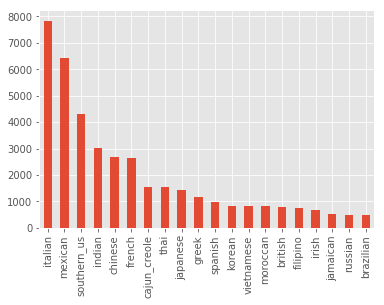

In [5]:
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

 <h1>Most common ingredients for every cuisine:</h1>

In [6]:
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [7]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


<h1> Table for cuisine and no. of Recepies</h1>

In [8]:
# Function to generate random colours for graphs
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [9]:
# Table for cusine and no. of recipes

data = [graph.Table(header=dict(values=['Cuisine','No. of Recipes'],
                                fill = dict(color=['#E9BFAF']), align = ['center'] * 5),
                                cells=dict(values=[df_train.cuisine.value_counts().index,df_train.cuisine.value_counts()],
                                align = ['left'] * 5))]

layout = graph.Layout(title='No. of recipes in each cuisine',
                        titlefont = dict(size = 20),
                        width=500, height=650, 
                        paper_bgcolor =  'rgba(0,0,0,0)',
                        plot_bgcolor = 'rgba(0,0,0,0)',
                        autosize = False,
                        margin=dict(l=30,r=30,b=15,t=50,pad=1))

iplot(dict(data=data, layout=layout))

# Plot for distribution of Cuisines

In [10]:
#  % Distribution of cuisines
percent_dist = []
for i in df_train.cuisine.value_counts():
    percent = (i/sum(df_train.cuisine.value_counts()))*100
    percent = "%.2f" % percent
    percent = str(percent + '%')
    percent_dist.append(percent)


In [11]:
# Plot for % Distribution
data = [graph.Bar(x = df_train.cuisine.value_counts().values[::-1],
                y = [i for i in df_train.cuisine.value_counts().index][::-1],
                text = percent_dist[::-1],  textposition = 'outside', 
                orientation = 'h',marker = dict(color = random_colours(20)))]

layout = graph.Layout(title = '% Distribution of recipes in each cuisine',
                   titlefont = dict(size = 25),
                   width =  1000, height = 450, 
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   paper_bgcolor = 'rgba(255, 255, 255, 1)',
                   margin = dict(l=75,r=110,b=50,t=60))
 
iplot(dict(data=data, layout=layout))

In [12]:
# Max and min no. of ingredients in a dish

print('Max No. of Ingredients in a Dish: ',df_train['ingredients'].str.len().max())
print('Min No. of Ingredients in a Dish: ',df_train['ingredients'].str.len().min())

Max No. of Ingredients in a Dish:  65
Min No. of Ingredients in a Dish:  1


In [13]:
# Histogram for distribution of Recipe Length

data = [graph.Histogram(x = df_train['ingredients'].str.len(),
                        xbins = dict(start  = 0, end = 90, size = 1),
                        marker = dict(color = random_colours(1)),
                        opacity = 0.75)]
layout = graph.Layout(title  = 'Distribution of Recipe Length',
                    xaxis = dict(title = 'No. of ingredients'),
                    yaxis = dict(title = 'No. of recipes'),
                    bargap = 0.05,
                    bargroupgap = 0.2)

iplot(graph.Figure(data=data, layout=layout))

In [14]:
# Working on the ingredients

allingredients = [] # Stores all ingredients with repetition
for item in df_train['ingredients']:
    for ingr in item:
        allingredients.append(ingr) 

In [15]:
# Count how many times each ingredient occurs

countingr = Counter()
for ingr in allingredients:
     countingr[ingr] += 1

# Plot for most common Ingredients

In [16]:
# PLot for most common ingredients

mostcommon  = countingr.most_common(20)

data = [graph.Bar(x = [i[1] for i in mostcommon][::-1],
                    y  = [i[0] for i in mostcommon][::-1],
                    orientation = 'h', marker = dict(color = random_colours(20)))]
layout = graph.Layout(xaxis = dict(title= 'No. of occurences of ingredients'),
                        yaxis = dict(title='Ingredient'),
                        title = '20 Most Common Ingredients', titlefont = dict(size = 20),
                        margin = dict(l=150, r=10, b=60, t=60,  pad=5),
                        width = 800, height = 500)

iplot(graph.Figure(data=data, layout=layout))

In [17]:
# Function which returns no. of unique ingredients in a given cuisine
def findnumingr(cuisine):
    ingrlist = []
    for item in df_train[df_train['cuisine'] == cuisine]['ingredients']:
        for ingr in item:
            ingrlist.append(ingr)
    result = (cuisine, len(list(set(ingrlist))))         
    return result



In [18]:
# Cuisine wise no. of unique ingredients

labels = [i for i in df_train.cuisine.value_counts().index][::-1]
cuisineallingr = []

for i in labels:
    cuisineallingr.append(findnumingr(i))

In [19]:
# Plot of cuisine wise no. of unique ingredients

data = [graph.Bar(x = [i[1] for i in cuisineallingr],
                    y = [i[0] for i in cuisineallingr],
                    orientation = 'h', marker = dict(color = random_colours(20)))]
layout = graph.Layout(xaxis = dict(title= 'Count of different ingredients'),
                        yaxis = dict(title='Cuisine'),
                        title = 'No. of unique ingredients used in each cuisine', titlefont = dict(size = 20),
                        margin =  dict(l=100,r=10,b=60,t=60),
                        width =800, height = 500)

iplot(graph.Figure(data=data, layout=layout))

In [20]:
ingredients = list(set(allingredients))

In [21]:
# Function which returns a DataFrame with top specific ingredients of a given cuisine
def cuisine_unique(cuisine, numingr, allingredients):
    allother = []
    for item in df_train[df_train.cuisine != cuisine]['ingredients']:
        for ingr in item:
            allother.append(ingr)
    allother  = list(set(allother))
    
    specificingr = [x for x in allingredients if x not in allother]
    
    mycounter = Counter()
    
    for item in df_train[df_train.cuisine == cuisine]['ingredients']:
        for ingr in item:
            mycounter[ingr] += 1
    keep = list(specificingr)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    cuisinespec = pd.DataFrame(mycounter.most_common(numingr), columns = ['ingredient','count'])
    
    return cuisinespec

In [22]:
# Print top 10 specific ingredients of italian cuisine with frequency

print("Top 10 specific ingredients in Italian cuisine:\n\n")
cuisine_unique('italian', 10, ingredients)

Top 10 specific ingredients in Italian cuisine:




,ingredient,count
0,gnocchi,41
1,"lasagna noodles, cooked and drained",26
2,bulk italian sausag,21
3,potato gnocchi,20
4,cheese ravioli,18
5,bocconcini,17
6,Bertolli® Classico Olive Oil,16
7,ravioli,16
8,bucatini,16
9,dried fettuccine,14


In [23]:
# Prepare the data for transformation to Tf-Idf matrix

features = []
for item in df_train['ingredients']:
    features.append(item)

# Fit the TfidfVectorizer to data

tfidf = TfidfVectorizer(vocabulary = list(set([str(i).lower() for i in ingredients])),
                        max_df=0.99,
                        norm='l2',
                        ngram_range=(1, 4))

X_tr = tfidf.fit_transform([str(i) for i in features]) # Matrix of tf-idf scores

feature_names = tfidf.get_feature_names()



In [24]:
# Function for finding the most important features in a given cuisine according to Tf-Idf score

def top_feats_by_class(trainsample, target, featurenames, min_tfidf=0.1, top_n = 10):
    dfs = []
    labels = np.unique(target)
    
    for label in labels:
        
        ids = np.where(target==label)
        D = trainsample[ids].toarray()
        D[D < min_tfidf] = 0
        tfidf_means = np.nanmean(D, axis=0)
        
        topn_ids = np.argsort(tfidf_means)[::-1][:top_n] # Get top n tfidf values
        top_feats = [(featurenames[i], tfidf_means[i]) for i in topn_ids] # find their corresponding feature names
        df = pd.DataFrame(top_feats)
        df.columns = ['feature', 'tfidf']
        
        df['cuisine'] = label
        dfs.append(df)
        
    return dfs

In [25]:
target = df_train['cuisine']
result_tfidf = top_feats_by_class(X_tr, target, feature_names, 0.1, top_n=5)

In [26]:
# Exctract labels from the result dataframe

labels = []
for i, e in enumerate(result_tfidf):
    labels.append(result_tfidf[i].cuisine[0])

# Set the plot for 1st 10 cuisines

totalPlot = 10
y = [[item]*2 for item in range(1,10)]
y = list(chain.from_iterable(y))
z = [1,2]*int((totalPlot/2))

fig = tools.make_subplots(rows = 5, cols=2,
                          subplot_titles = labels[0:10],
                          specs = [[{}, {}],[{}, {}],[{}, {}],[{}, {}],[{}, {}]],
                          horizontal_spacing = 0.20)

traces = []

for index,element in enumerate(result_tfidf[0:10]): 
    trace = graph.Bar(x = result_tfidf[index].tfidf[::-1],
                        y = result_tfidf[index].feature[::-1],
                        orientation = 'h',
                        marker = dict(color = random_colours(5)))
    traces.append(trace)

for t,y,z in zip(traces,y,z):
    fig.append_trace(t, y,z)

    fig['layout'].update(height = 800, width = 840,
    margin = dict(l=110,r=5,b=40,t=90,pad=5), showlegend = False, title = 'Feature Importance based on Tf-Idf measure')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]  
[ (2,1) x3,y3 ]    [ (2,2) x4,y4 ]  
[ (3,1) x5,y5 ]    [ (3,2) x6,y6 ]  
[ (4,1) x7,y7 ]    [ (4,2) x8,y8 ]  
[ (5,1) x9,y9 ]    [ (5,2) x10,y10 ]



In [27]:
# Set the plot for next 10 cuisines

totalPlot = 10
y = [[item]*2 for item in range(1,10)]
y = list(chain.from_iterable(y))
z = [1,2]*int((totalPlot/2))

fig = tools.make_subplots(rows= 5, cols=2,
                          subplot_titles= labels[10:20],
                          specs = [[{}, {}],[{}, {}],[{}, {}],[{}, {}],[{}, {}]],
                          horizontal_spacing = 0.20)
traces = []
for index,element in enumerate(result_tfidf[10:20]): 
    trace = graph.Bar(x = result_tfidf[10:20][index].tfidf[::-1],
            y = result_tfidf[10:20][index].feature[::-1],
            orientation = 'h', marker = dict(color = random_colours(5)))
    traces.append(trace)

for t,y,z in zip(traces,y,z):
    fig.append_trace(t, y,z)

    fig['layout'].update(height = 800, width = 840,
    margin = dict(l=100,r=5,b=40,t=90,pad=5), showlegend = False, title = 'Feature Importance based on Tf-Idf measure')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]  
[ (2,1) x3,y3 ]    [ (2,2) x4,y4 ]  
[ (3,1) x5,y5 ]    [ (3,2) x6,y6 ]  
[ (4,1) x7,y7 ]    [ (4,2) x8,y8 ]  
[ (5,1) x9,y9 ]    [ (5,2) x10,y10 ]



In [28]:
df_train['every_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()


,cuisine,id,ingredients,every_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


<h1>Plot for all the ingredients as per the cuisine</h1>

In [29]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

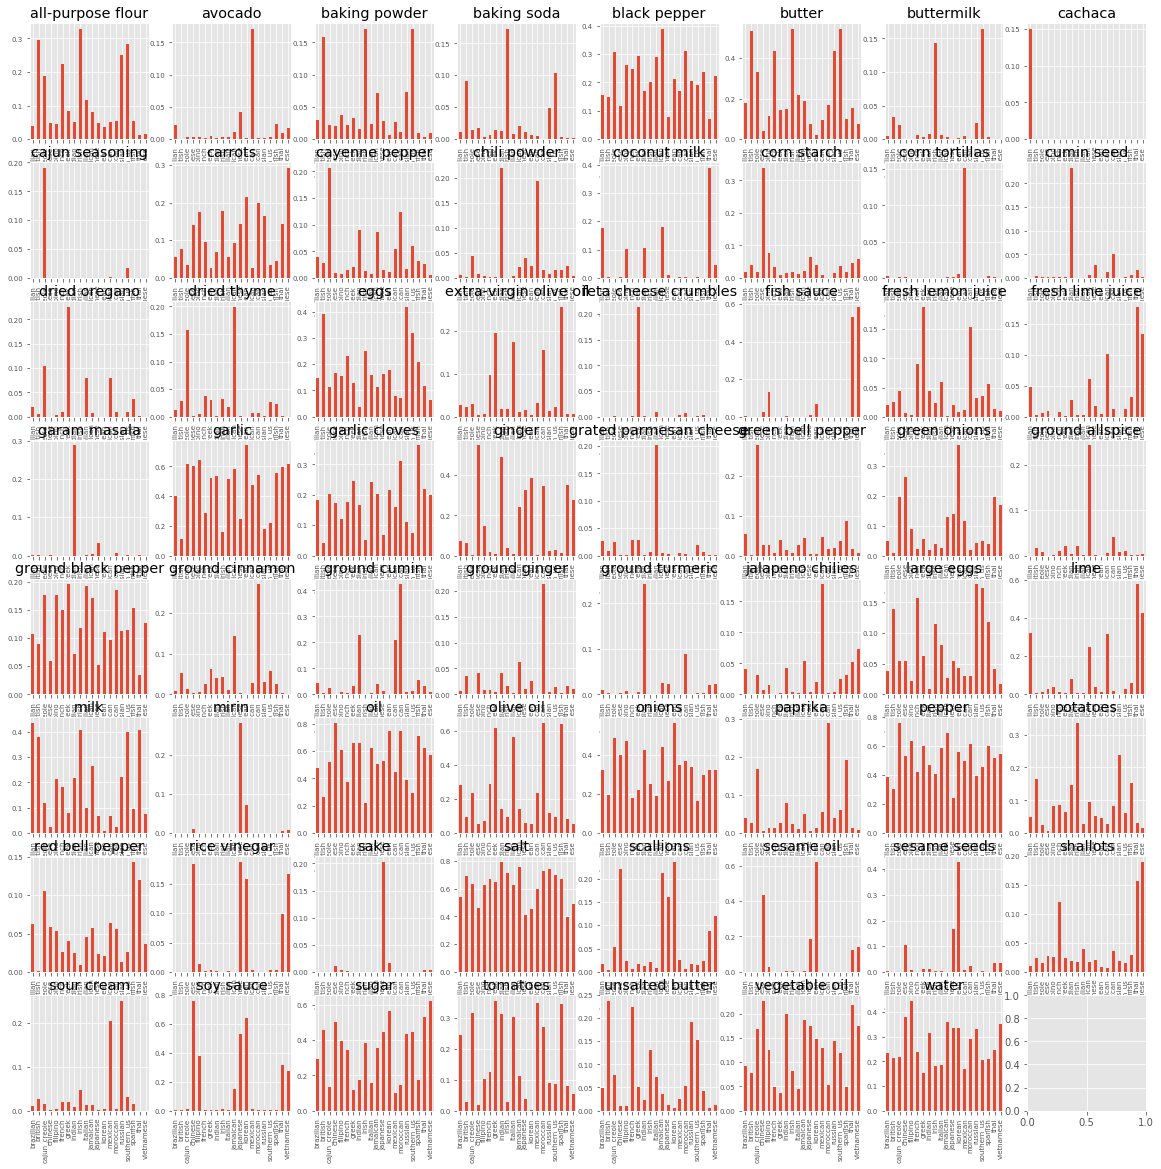

In [30]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['every_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

<h1>Data Preprocessing</h1>


In [31]:
## convert multi-word ingredient into single word by substituting underscore on place of space
def sub_space(x):
    temp_value = list()
    for i in x:
        temp_value.append(re.sub(r'[^0-9a-zA-Z]+','_',i.lower()))
    return temp_value

df_train['ingredients_new'] = df_train['ingredients'].apply(sub_space)
df_test['ingredients_new'] = df_test['ingredients'].apply(sub_space)

## convert list of ingredients into a sentence
def convert_list_to_sent(x):
    return ' '.join(x)

df_train['ingredient_sent'] = df_train['ingredients_new'].apply(convert_list_to_sent)
df_test['ingredient_sent'] = df_test['ingredients_new'].apply(convert_list_to_sent)

display(df_train.head())
display(df_test.head())

,cuisine,id,ingredients,every_ingredients,ingredients_new,ingredient_sent
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...,"[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...,"[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...,"[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt,"[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...,"[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...


,id,ingredients,ingredients_new,ingredient_sent
0,18009,"[baking powder, eggs, all-purpose flour, raisi...","[baking_powder, eggs, all_purpose_flour, raisi...",baking_powder eggs all_purpose_flour raisins m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...","[sugar, egg_yolks, corn_starch, cream_of_tarta...",sugar egg_yolks corn_starch cream_of_tartar ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","[sausage_links, fennel_bulb, fronds, olive_oil...",sausage_links fennel_bulb fronds olive_oil cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","[meat_cuts, file_powder, smoked_sausage, okra,...",meat_cuts file_powder smoked_sausage okra shri...
4,35687,"[ground black pepper, salt, sausage casings, l...","[ground_black_pepper, salt, sausage_casings, l...",ground_black_pepper salt sausage_casings leeks...


<h1>Data Cleaning</h1>

In [32]:
def text_prepare(ingredient):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    DOUBLE_SPACE_RE = re.compile('\s{2,}')
    STOPWORDS = set(stopwords.words('english'))
    
    ingredient = ingredient.strip(" ")
    #lower casing letters
    ingredient = ingredient.lower()
    #replacing symbols by space
    ingredient = re.sub(REPLACE_BY_SPACE_RE,' ',ingredient)
    #deleting bad words
    ingredient = re.sub(BAD_SYMBOLS_RE,'',ingredient)
    #removing double space
    ingredient = re.sub(DOUBLE_SPACE_RE,'',ingredient)
    # remove numbers with percentages
    ingredient = re.sub('[0-9]*% ','',ingredient)
    # remove ounce information
    ingredient = re.sub("\(.*oz.\)",'',ingredient)
    # remove brand names with registered
    ingredient = re.sub("[A-Z]*[a-z]*®",'',ingredient)
    # remove brand names with trademark
    ingredient = re.sub("[A-Z]*[a-z]*™", '', ingredient)
    # remove numbers with +
    ingredient = re.sub("[0-9]+",'',ingredient)
    # replace & and -
    ingredient = ingredient.replace("&",'')
    ingredient = ingredient.replace("-", '')
    # lowercase all indegredients
    ingredient = ingredient.lower()
    # removing whitespacing once more
    ingredient = ingredient.strip()
    #removing stop words
    ingredient = ' '.join([word for word in ingredient.split(" ") if word not in STOPWORDS])
    
    return ingredient

def apply_text_prepare_to_list(ingredient_list):
    return ' '.join([text_prepare(ingredient) for ingredient in ingredient_list])
df_train


,cuisine,id,ingredients,every_ingredients,ingredients_new,ingredient_sent
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...,"[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...,"[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...,"[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt,"[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...,"[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour;sugar;butter;eggs;fresh ginger roo...,"[plain_flour, sugar, butter, eggs, fresh_ginge...",plain_flour sugar butter eggs fresh_ginger_roo...
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil;salt;medium shrimp;pepper;garlic;cho...,"[olive_oil, salt, medium_shrimp, pepper, garli...",olive_oil salt medium_shrimp pepper garlic cho...
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",sugar;pistachio nuts;white almond bark;flour;v...,"[sugar, pistachio_nuts, white_almond_bark, flo...",sugar pistachio_nuts white_almond_bark flour v...
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",olive oil;purple onion;fresh pineapple;pork;po...,"[olive_oil, purple_onion, fresh_pineapple, por...",olive_oil purple_onion fresh_pineapple pork po...
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes;fresh basil;garlic;extra-virg...,"[chopped_tomatoes, fresh_basil, garlic, extra_...",chopped_tomatoes fresh_basil garlic extra_virg...


# Lemmatization and stemming


In [33]:
wnl = WordNetLemmatizer()
def lemmatize_each_row(x):
    y = []
    for each in x:
        y.append(wnl.lemmatize(each.lower()))
    return y

df_train['lemmatized_ingredients_list'] = df_train.apply(lambda row: lemmatize_each_row(row['ingredients']), axis=1)
all_ingredients_lemmatized = []
for ingredients_lists in df_train.ingredients:
    for ingredient in ingredients_lists:
        all_ingredients_lemmatized.append(wnl.lemmatize(ingredient.lower()))
all_ingredients_lemmatized = set(all_ingredients_lemmatized)
df_test['lemmatized_test_ingredients_list'] = df_test.apply(lambda row: lemmatize_each_row(row['ingredients']), axis=1)
all_ingredients_lemmatized_test = []
for ingredients_lists in df_test.ingredients:
    for ingredient in ingredients_lists:
        all_ingredients_lemmatized_test.append(wnl.lemmatize(ingredient.lower()))
all_ingredients_lemmatized_test = set(all_ingredients_lemmatized_test)

all_ingredients_union = all_ingredients_lemmatized | all_ingredients_lemmatized_test

In [34]:
df_train

,cuisine,id,ingredients,every_ingredients,ingredients_new,ingredient_sent,lemmatized_ingredients_list
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...,"[romaine_lettuce, black_olives, grape_tomatoes...",romaine_lettuce black_olives grape_tomatoes ga...,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...,"[plain_flour, ground_pepper, salt, tomatoes, g...",plain_flour ground_pepper salt tomatoes ground...,"[plain flour, ground pepper, salt, tomato, gro..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...,"[eggs, pepper, salt, mayonaise, cooking_oil, g...",eggs pepper salt mayonaise cooking_oil green_c...,"[egg, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt,"[water, vegetable_oil, wheat, salt]",water vegetable_oil wheat salt,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...,"[black_pepper, shallots, cornflour, cayenne_pe...",black_pepper shallots cornflour cayenne_pepper...,"[black pepper, shallot, cornflour, cayenne pep..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour;sugar;butter;eggs;fresh ginger roo...,"[plain_flour, sugar, butter, eggs, fresh_ginge...",plain_flour sugar butter eggs fresh_ginger_roo...,"[plain flour, sugar, butter, egg, fresh ginger..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil;salt;medium shrimp;pepper;garlic;cho...,"[olive_oil, salt, medium_shrimp, pepper, garli...",olive_oil salt medium_shrimp pepper garlic cho...,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",sugar;pistachio nuts;white almond bark;flour;v...,"[sugar, pistachio_nuts, white_almond_bark, flo...",sugar pistachio_nuts white_almond_bark flour v...,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",olive oil;purple onion;fresh pineapple;pork;po...,"[olive_oil, purple_onion, fresh_pineapple, por...",olive_oil purple_onion fresh_pineapple pork po...,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes;fresh basil;garlic;extra-virg...,"[chopped_tomatoes, fresh_basil, garlic, extra_...",chopped_tomatoes fresh_basil garlic extra_virg...,"[chopped tomatoes, fresh basil, garlic, extra-..."


# Using count vectorizer encoding our features to a matrix.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['every_ingredients'].values)
X.shape

(39774, 3010)

In [36]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [37]:
def generate_text(data):
    text_data = [" ".join(doc['ingredients']).lower() for doc in data]
    return text_data 

In [38]:
train_text = generate_text(train)
test_text = generate_text(test)
target = [doc['cuisine'] for doc in train]
cuisines = set(target)


In [39]:
vectorizer = CountVectorizer(analyzer = 'word',
                             ngram_range = (1,1), # Unigrams
                             binary = True, # Accounts for repetition within recipe
                             tokenizer = None, 
                             preprocessor = None,
                             stop_words = None,
                             max_df = 0.99) # Any word appearing in more than 99% of the sample will be discarded


In [40]:
tfidf = TfidfVectorizer(binary=True)
def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 
X = tfidf_features(train_text, flag="train")
X_test_R = tfidf_features(test_text, flag="test")



In [41]:
lb = LabelEncoder()
y = lb.fit_transform(target)
y_NN = keras.utils.to_categorical(y)


<h1>Building a Neural Network model</h1>

In [42]:
model = keras.Sequential()
model.add(keras.layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=1), activation='relu', input_dim=3010))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(1000, kernel_initializer=keras.initializers.he_normal(seed=2), activation='relu'))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(20, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4), activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0708 22:05:54.709810 140468952188736 nn_ops.py:4224] Large dropout rate: 0.81 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0708 22:05:54.745626 140468952188736 nn_ops.py:4224] Large dropout rate: 0.81 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0708 22:05:54.759649 140468952188736 deprecation.py:506] From /home/akash/anaconda3/envs/my_env/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<h1>Training the Neural Network model</h1>

In [62]:
from sklearn.model_selection import train_test_split

X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X, y_NN , random_state = 0)

history = model.fit(X_train_NN, y_train_NN, epochs=20, batch_size=512, validation_split=0.1)

# model.save_weights("model.h5")
# print("Saved model to disk")


Train on 26847 samples, validate on 2983 samples
Epoch 1/20
26847/26847 [==============================] - 10s 369us/sample - loss: 2.2914 - acc: 0.3389 - val_loss: 1.5642 - val_acc: 0.5625
Epoch 2/20
26847/26847 [==============================] - 7s 262us/sample - loss: 1.4368 - acc: 0.5855 - val_loss: 1.0595 - val_acc: 0.6802
Epoch 3/20
26847/26847 [==============================] - 7s 258us/sample - loss: 1.1150 - acc: 0.6693 - val_loss: 0.8875 - val_acc: 0.7362
Epoch 4/20
26847/26847 [==============================] - 7s 262us/sample - loss: 0.9697 - acc: 0.7106 - val_loss: 0.8133 - val_acc: 0.7580
Epoch 5/20
26847/26847 [==============================] - 7s 256us/sample - loss: 0.8645 - acc: 0.7419 - val_loss: 0.7652 - val_acc: 0.7724
Epoch 6/20
26847/26847 [==============================] - 7s 256us/sample - loss: 0.7916 - acc: 0.7633 - val_loss: 0.7396 - val_acc: 0.7861
Epoch 7/20
26847/26847 [==============================] - 7s 263us/sample - loss: 0.7428 - acc: 0.7748 - val_l

In [63]:
score=model.evaluate(X_test_NN,y_test_NN) 

9944/9944 [==============================] - 4s 374us/sample - loss: 0.7170 - acc: 0.8020


In [64]:
y_predict_NN=model.predict(X_test_NN)
predictions_encoded = lb.inverse_transform([np.argmax(pred) for pred in y_predict_NN])
y_predict_NN = lb.fit_transform(predictions_encoded)
y_test_NN_encoded=lb.inverse_transform([np.argmax(pred) for pred in y_test_NN])
y_test_NN = lb.fit_transform(y_test_NN_encoded)



In [65]:
summary = np.zeros((20, 20), dtype=np.int32)

for y_test_i, y_predict_i in zip(y_test_NN, y_predict_NN):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary, 
                          columns=cuisines, 
                          index=cuisines)

summary_df

,spanish,irish,russian,chinese,southern_us,indian,korean,moroccan,italian,british,jamaican,greek,cajun_creole,mexican,japanese,thai,vietnamese,french,brazilian,filipino
spanish,70,0,2,1,3,4,0,2,1,7,1,0,0,13,0,0,6,5,5,0
irish,0,99,2,0,1,29,1,3,14,13,2,0,0,2,1,1,28,0,2,0
russian,0,4,258,1,0,16,0,0,1,14,1,0,1,6,0,1,55,4,0,0
chinese,0,3,1,598,3,3,0,0,0,6,1,15,27,2,1,1,8,2,10,15
southern_us,1,4,1,22,103,3,1,4,1,5,0,4,1,9,0,1,6,0,8,7
indian,0,16,2,3,1,434,7,1,9,120,3,2,0,4,4,12,31,8,0,1
korean,0,0,0,0,1,10,214,4,2,48,0,0,0,5,8,1,3,6,0,0
moroccan,1,1,0,1,2,2,5,725,1,2,0,2,0,13,9,2,4,2,10,1
italian,0,10,1,0,1,18,0,2,95,8,1,0,1,1,0,2,19,0,0,0
british,1,3,5,2,0,70,33,4,4,1745,0,1,0,8,4,3,36,11,2,0


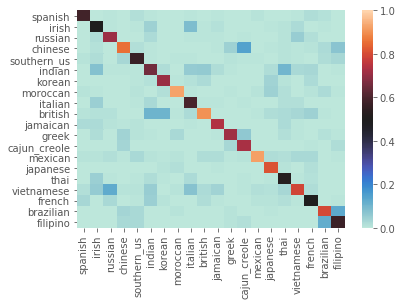

In [66]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [67]:
print(classification_report(y_test_NN,y_predict_NN))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69       120
           1       0.58      0.50      0.54       198
           2       0.76      0.71      0.74       362
           3       0.81      0.86      0.83       696
           4       0.75      0.57      0.65       181
           5       0.63      0.66      0.65       658
           6       0.79      0.71      0.75       302
           7       0.89      0.93      0.91       783
           8       0.66      0.60      0.62       159
           9       0.82      0.90      0.86      1932
          10       0.84      0.74      0.79       147
          11       0.84      0.72      0.77       348
          12       0.73      0.73      0.73       183
          13       0.92      0.92      0.92      1631
          14       0.81      0.81      0.81       199
          15       0.62      0.53      0.57       118
          16       0.76      0.79      0.78      1076
          17       0.69    

<h1>Plotting learning curves</h1>
Learning curves show us overting/underfiting

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


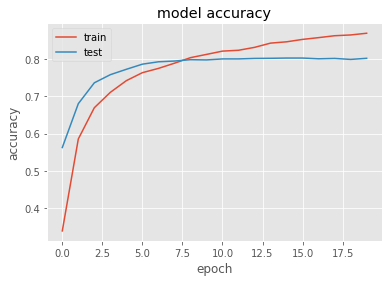

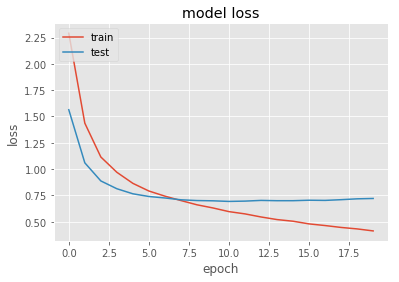

In [68]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [71]:
# X_test = tfidf_features(test_text, flag="test")

y_predict_NN=model.predict(X_test)
print(X_test.shape)
predictions_encoded = lb.inverse_transform([np.argmax(pred) for pred in y_predict_NN])
predictions = lb.inverse_transform([np.argmax(pred) for pred in predictions_encoded])
test_id = [doc['id'] for doc in test]
sub = pd.DataFrame({'id': test_id, 'cuisine': predictions}, columns=['id', 'cuisine'])
sub.to_csv('output_NN.csv', index=False)


(9944, 3010)


<h1>Support Vector Machine(RBF Kernel)</h1>

In [72]:
# Model Training 
print ("Train the model ... ")
classifier = SVC(C=100, # penalty parameter
	 			 kernel='rbf', # kernel type, rbf working fine here
	 			 degree=3, # default value
	 			 gamma=1, # kernel coefficient
	 			 coef0=1, # change to 1 from default value of 0.0
	 			 shrinking=True, # using shrinking heuristics
	 			 tol=0.001, # stopping criterion tolerance 
	      		 probability=False, # no need to enable probability estimates
	      		 cache_size=200, # 200 MB cache size
	      		 class_weight=None, # all classes are treated equally 
	      		 verbose=False, # print the logs 
	      		 max_iter=-1, # no limit, let it run
          		 decision_function_shape=None, # will use one vs rest explicitly 
          		 random_state=None)
model_SVM = OneVsRestClassifier(classifier, n_jobs=1)

Train the model ... 


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state = 0)

In [79]:
st = time.time()
model_SVM.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [80]:
y_predict_SVM = model_SVM.predict(X_test)
y_predict_SVM=lb.inverse_transform(y_predict_SVM)
y_predict_SVM = lb.fit_transform(y_predict_SVM)

In [81]:
print('Accuracy: %0.4f [SVM RBF] [Time: %ss]' %(accuracy_score(y_test, y_predict_SVM), (time.time()-st)))

Accuracy: 0.8200 [SVM RBF] [Time: 2181.6514179706573s]


In [82]:

summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, y_predict_SVM):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary, 
                          columns=cuisines, 
                          index=cuisines)

summary_df

,spanish,irish,russian,chinese,southern_us,indian,korean,moroccan,italian,british,jamaican,greek,cajun_creole,mexican,japanese,thai,vietnamese,french,brazilian,filipino
spanish,73,3,2,1,2,2,0,2,0,8,0,0,0,11,1,0,4,7,4,0
irish,0,110,1,1,0,20,1,6,12,13,2,1,0,3,0,3,23,1,1,0
russian,0,3,272,0,1,12,0,0,1,10,0,0,0,7,0,0,53,3,0,0
chinese,0,3,1,614,1,5,0,1,0,5,0,13,17,2,1,0,5,1,13,14
southern_us,1,1,1,13,121,2,0,3,2,7,0,1,1,8,0,1,7,0,7,5
indian,0,15,3,2,2,454,3,4,6,103,1,3,1,11,1,8,35,5,0,1
korean,0,0,0,0,0,11,221,5,0,44,0,0,0,5,6,1,5,4,0,0
moroccan,0,1,0,0,1,2,4,726,0,5,0,6,1,13,7,2,5,2,7,1
italian,0,15,0,0,0,12,2,0,97,11,1,0,1,2,0,0,16,2,0,0
british,2,3,3,3,0,65,33,3,2,1752,0,2,0,12,5,5,34,7,1,0


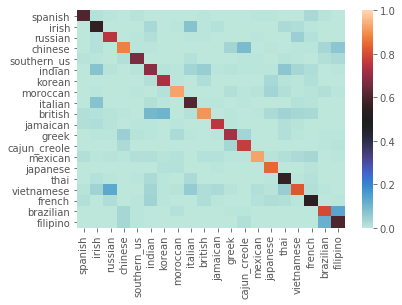

In [83]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [84]:
print(classification_report(y_test,y_predict_SVM))


              precision    recall  f1-score   support

           0       0.88      0.61      0.72       120
           1       0.64      0.56      0.60       198
           2       0.78      0.75      0.76       362
           3       0.83      0.88      0.86       696
           4       0.88      0.67      0.76       181
           5       0.67      0.69      0.68       658
           6       0.79      0.73      0.76       302
           7       0.89      0.93      0.91       783
           8       0.72      0.61      0.66       159
           9       0.83      0.91      0.87      1932
          10       0.90      0.76      0.82       147
          11       0.84      0.73      0.78       348
          12       0.81      0.78      0.79       183
          13       0.92      0.93      0.92      1631
          14       0.85      0.84      0.85       199
          15       0.66      0.56      0.61       118
          16       0.78      0.82      0.80      1076
          17       0.74    

<h1>Logistic Regression</h1>

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(C=10,dual=False)
model_LR.fit(X_train , y_train)
print(model_LR.score(X_test, y_test))
y_predict_LR=model_LR.predict(X_test)


0.7947203016970459


In [89]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, y_predict_LR):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_df

,greek,chinese,vietnamese,jamaican,italian,cajun_creole,thai,british,moroccan,indian,japanese,southern_us,spanish,brazilian,korean,russian,mexican,irish,french,filipino
greek,56,1,1,1,3,4,0,3,1,8,1,0,0,10,0,0,7,6,4,1
chinese,0,78,2,0,0,28,0,6,5,13,4,1,0,2,1,3,22,0,1,0
vietnamese,0,1,198,1,0,12,0,2,1,11,0,0,0,4,0,0,35,5,0,0
jamaican,1,2,0,481,2,4,0,2,0,6,0,18,17,2,1,1,5,0,9,10
italian,2,2,0,12,85,3,0,3,1,5,0,3,0,6,0,1,7,0,5,5
cajun_creole,0,13,5,1,1,332,4,0,6,93,2,3,2,5,3,10,36,6,0,1
thai,0,2,0,1,1,11,163,8,0,40,0,0,0,4,5,0,5,6,0,0
british,1,1,0,2,3,2,4,584,0,1,1,2,0,11,8,2,7,2,5,1
moroccan,1,7,0,1,0,17,0,1,59,7,0,0,0,2,2,1,21,2,0,0
indian,0,3,6,2,0,65,21,3,4,1381,0,2,0,12,3,2,36,8,2,1


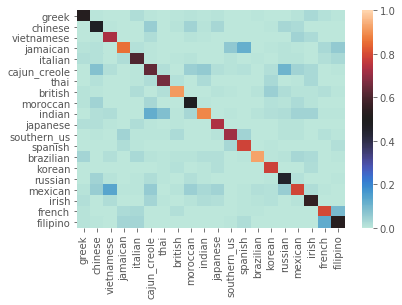

In [90]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [91]:
print(classification_report(y_test,y_predict_LR))


              precision    recall  f1-score   support

           0       0.78      0.52      0.63       107
           1       0.60      0.47      0.53       166
           2       0.74      0.73      0.74       270
           3       0.83      0.86      0.84       561
           4       0.74      0.61      0.67       140
           5       0.60      0.63      0.62       523
           6       0.83      0.66      0.74       246
           7       0.88      0.92      0.90       637
           8       0.68      0.49      0.57       121
           9       0.81      0.89      0.85      1551
          10       0.82      0.74      0.78       122
          11       0.82      0.72      0.76       275
          12       0.78      0.79      0.78       145
          13       0.92      0.93      0.92      1317
          14       0.81      0.78      0.79       161
          15       0.60      0.46      0.52        92
          16       0.73      0.79      0.76       852
          17       0.70    

<h1>Naive Bayes classifier</h1>

In [90]:

clf2 = BernoulliNB(alpha = 0, fit_prior = False)
f = clf2.fit(big_data_matrix, classes)
result = [(ref == res, ref, res) for (ref, res) in zip(classes, clf2.predict(big_data_matrix))]
accuracy_learn = sum (r[0] for r in result) / len(result)

print('Accuracy on the learning set: ', accuracy_learn)

Accuracy on the learning set:  0.8204606024035802


<h1>SVM(Linear Kernel)</h1>

In [92]:
model_SVM_L = SVC(kernel = 'linear', random_state = 42, probability=True)
st = time.time()
model_SVM_L.fit(X_train, y_train)
predictions_SVM = model_SVM_L.predict(X_test)
print('Accuracy: %0.4f [SVM Linear] [Time: %ss]' %(accuracy_score(y_test, predictions_SVM), (time.time()-st)))

Accuracy: 0.7923 [SVM Linear] [Time: 600.0440640449524s]


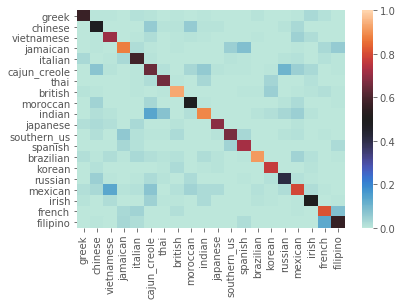

In [93]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions_SVM):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [94]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       107
           1       0.62      0.49      0.55       166
           2       0.74      0.71      0.73       270
           3       0.80      0.88      0.84       561
           4       0.71      0.59      0.64       140
           5       0.58      0.65      0.61       523
           6       0.84      0.66      0.74       246
           7       0.86      0.94      0.90       637
           8       0.73      0.50      0.59       121
           9       0.80      0.89      0.84      1551
          10       0.91      0.69      0.79       122
          11       0.84      0.67      0.74       275
          12       0.81      0.72      0.76       145
          13       0.92      0.92      0.92      1317
          14       0.85      0.77      0.81       161
          15       0.67      0.41      0.51        92
          16       0.71      0.79      0.75       852
          17       0.75    

<h1>Random Forest Classifier</h1>

In [95]:
model_RF = RandomForestClassifier(n_estimators = 600, random_state = 42)
st = time.time()
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
print('Accuracy: %0.4f [Random Forest] [Time: %ss]' %(accuracy_score(y_test, predictions_RF), (time.time()-st)))

Accuracy: 0.7540 [Random Forest] [Time: 304.2341730594635s]


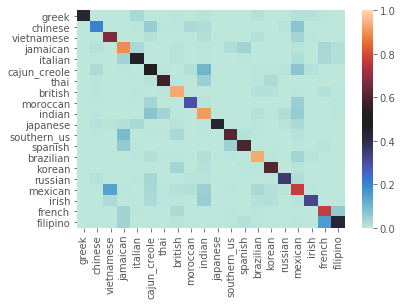

In [96]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions_RF):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [97]:
print(classification_report(y_test,predictions_RF))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60       107
           1       0.71      0.20      0.32       166
           2       0.76      0.67      0.71       270
           3       0.74      0.89      0.81       561
           4       0.78      0.46      0.58       140
           5       0.62      0.52      0.56       523
           6       0.89      0.58      0.70       246
           7       0.84      0.94      0.88       637
           8       0.82      0.30      0.44       121
           9       0.70      0.92      0.80      1551
          10       1.00      0.43      0.61       122
          11       0.85      0.61      0.71       275
          12       0.88      0.60      0.71       145
          13       0.85      0.94      0.89      1317
          14       0.87      0.61      0.72       161
          15       0.85      0.36      0.50        92
          16       0.62      0.77      0.69       852
          17       0.87    

<h1>Ensemble Classifier</h1>

In [98]:
eclf = VotingClassifier(estimators = [('model_LR',model_LR ),
                                        ('model_SVM', model_SVM_L),
                                        ('model_RF', model_RF)],
                                        voting = 'soft', weights = [1,1,1])
st = time.time()
eclf.fit(X_train, y_train)
predictions = eclf.predict(X_test)
print('Accuracy: %0.4f [Ensemble] [Time: %ss]' %(accuracy_score(y_test, predictions), (time.time()-st)))

Accuracy: 0.8060 [Ensemble] [Time: 975.1724214553833s]


In [99]:
summary = np.zeros((20, 20), dtype=np.int32)
for y_test_i, y_predict_i in zip(y_test, predictions):
    summary[y_test_i, y_predict_i] += 1

summary_df = pd.DataFrame(summary,columns=cuisines, 
                          index=cuisines)

summary_df

,greek,chinese,vietnamese,jamaican,italian,cajun_creole,thai,british,moroccan,indian,japanese,southern_us,spanish,brazilian,korean,russian,mexican,irish,french,filipino
greek,60,1,1,1,3,2,0,3,0,7,0,0,0,13,0,0,7,5,4,0
chinese,0,82,0,0,0,25,1,6,7,14,2,0,0,1,0,2,25,0,1,0
vietnamese,0,1,196,0,0,11,0,3,1,11,0,0,0,6,0,0,36,5,0,0
jamaican,0,1,0,488,2,2,0,3,0,7,0,16,14,3,1,0,3,0,11,10
italian,1,0,1,13,89,3,0,2,0,5,0,3,1,5,0,1,9,0,4,3
cajun_creole,0,10,3,1,1,344,2,0,4,94,2,3,1,5,1,9,36,6,0,1
thai,0,2,0,1,1,8,166,2,0,50,0,0,0,5,6,0,2,3,0,0
british,1,1,0,1,1,1,1,601,0,3,1,1,0,10,4,2,2,2,4,1
moroccan,1,5,0,1,0,16,0,1,62,7,0,0,0,1,1,1,23,1,0,1
indian,0,2,3,1,0,54,21,4,3,1400,0,2,0,11,3,3,41,2,1,0


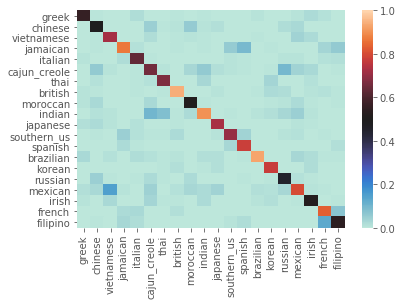

In [100]:
summary_norm = ( summary / summary.sum(axis=1) )
sns.heatmap( summary_norm, 
            vmin=0, vmax=1, center=0.5, 
            xticklabels=cuisines,
            yticklabels=cuisines);

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.56      0.67       107
           1       0.66      0.49      0.57       166
           2       0.75      0.73      0.74       270
           3       0.83      0.87      0.85       561
           4       0.79      0.64      0.70       140
           5       0.64      0.66      0.65       523
           6       0.85      0.67      0.75       246
           7       0.87      0.94      0.91       637
           8       0.74      0.51      0.60       121
           9       0.81      0.90      0.85      1551
          10       0.86      0.73      0.79       122
          11       0.83      0.71      0.76       275
          12       0.81      0.78      0.79       145
          13       0.92      0.93      0.92      1317
          14       0.85      0.78      0.81       161
          15       0.66      0.46      0.54        92
          16       0.73      0.80      0.77       852
          17       0.74    

<h1>Model's Comparison</h1>

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Precision</th>
      <th>Recall</th>
      <th>F1-Score</th>
  </tr>
  <tr>
    <td>ANN</td>
    <td>80.20%</td>
    <td>76%</td>
    <td>71%</td>
    <td>73%</td>
  </tr>
  <tr>
      
<td>SVM(RBF Kernel)</td>
    <td>82%</td>
    <td>79%</td>
    <td>73%</td>
    <td>76%</td>
    </tr>
    <tr>
    <td>Logistic Regression</td>
    <td>79.41%</td>
    <td>75%</td>
    <td>69%</td>
    <td>72%</td>
  </tr>
  <tr>
    <td>SVM(Linear)</td>
    <td>79.25%</td>
    <td>78%</td>
    <td>69%</td>
    <td>72%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>75.4%</td>
    <td>81%</td>
    <td>59%</td>
    <td>65%</td>
  </tr>
  <tr>
    <td>Ensemble</td>
    <td>80.6%</td>
    <td>78%</td>
    <td>70%</td>
    <td>74%</td>
  </tr>
</table>


<h1>Submission Accuracies</h1>

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    </tr>
      
<td>SVM(RBF Kernel)</td>
    <td>82.119%</td>
    </tr>
    <tr>
<td>naive Bayes</td>
    <td>80.752%</td>
    </tr>
    <tr>
    <td>ANN</td>
    <td>80.26%</td>
    </tr>
 <tr>
    <td>Ensemble</td>
    <td>79.475%</td>
    </tr>  
 <tr>
    <td>Logistic Regression</td>
    <td>78.388%</td>
    </tr>
<tr>
    <td>SVM(Linear Kernel)</td>
    <td>78.207%</td>
    </tr>

</table>
